# 学生成绩（一元线性回归）

In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import  LinearRegression
from sklearn.metrics import  mean_squared_error,r2_score


In [2]:
data=pd.read_csv(r".\highschool.txt",sep=" ")
data

,j3,s1,income
0,76,82,2
1,80,79,2
2,64,72,2
3,66,78,3
4,89,82,2
5,86,71,1
6,75,74,2
7,72,65,2
8,42,60,3
9,94,86,1


In [3]:
x=data['j3']
y=data['s1']
x=x.values.reshape(-1,1)

In [4]:
linear=LinearRegression()
linear.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [5]:
print("回归方程系数：",linear.coef_)

回归方程系数： [0.65110749]


In [6]:
print("回归方程截距",linear.intercept_)

回归方程截距 26.444090110945766


In [7]:
linear.score(x,y)

0.6324825640920154

In [8]:
y_pred=linear.predict(x)

In [9]:
print("mean_squared_error:",mean_squared_error(y_true=y,y_pred=y_pred))
print("r2_score:",r2_score(y_true=y,y_pred=y_pred))

mean_squared_error: 50.055874770667494
r2_score: 0.6324825640920154


In [10]:
x_min=x.min()
x_max=x.max()
x_index=np.arange(x_min,x_max).reshape(-1,1)

In [11]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']='SimHei'

Text(0.5, 1.0, '50名同学初三成绩和高三成绩回归分析')

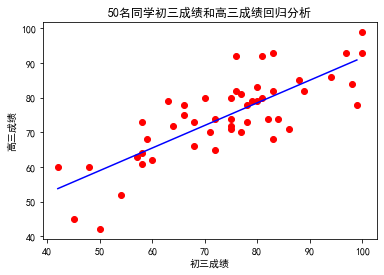

In [12]:
plt.scatter(x,y,color='red')
plt.plot(x_index,linear.predict(x_index),color='blue')
plt.xlabel("初三成绩")
plt.ylabel("高三成绩")
plt.title("50名同学初三成绩和高三成绩回归分析")

# 波士顿房价（多元线性回归）

In [13]:
from sklearn.datasets import load_boston

In [14]:
data=load_boston()
x=data['data']
y=data['target']

In [15]:
data['feature_names']

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
x_train,x_test,y__train,y_test=train_test_split(x,y,test_size=0.2)

In [18]:
model=LinearRegression()
model.fit(x_train,y__train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [19]:
print("回归方程系数：",model.coef_)
print("回归方程截距",model.intercept_)

回归方程系数： [-1.06211209e-01  4.31159085e-02  1.49782066e-02  2.90996975e+00
 -1.81447175e+01  3.55736218e+00  7.23283097e-03 -1.46082800e+00
  3.54483764e-01 -1.40140508e-02 -9.44843921e-01  9.13132655e-03
 -5.55834426e-01]
回归方程截距 38.59863936995489


In [20]:
y_pred=model.predict(x_test)

In [21]:
print("mean_squared_error:",mean_squared_error(y_true=y_test,y_pred=y_pred))
print("r2_score:",r2_score(y_true=y_test,y_pred=y_pred))

mean_squared_error: 13.763203242515617
r2_score: 0.8049297977728928


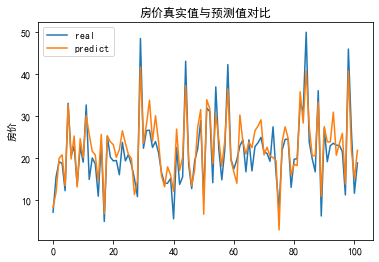

In [22]:
plt.plot(range(len(y_test)),y_test)
plt.plot(range(len(y_pred)),y_pred)
plt.legend(['real','predict'])
plt.ylabel('房价')
plt.title('房价真实值与预测值对比')
plt.show()

# 学生成绩（一元多项式回归）

In [24]:
data=pd.read_csv(r".\highschool.txt",sep=" ")
data

,j3,s1,income
0,76,82,2
1,80,79,2
2,64,72,2
3,66,78,3
4,89,82,2
5,86,71,1
6,75,74,2
7,72,65,2
8,42,60,3
9,94,86,1


In [26]:
x=data['j3'].values.reshape(-1,1)
y=data['s1']

In [27]:
from sklearn.preprocessing import PolynomialFeatures

In [29]:
poly_reg=PolynomialFeatures(degree=2)
x_poly=poly_reg.fit_transform(x)

In [31]:
linear=LinearRegression()
linear.fit(x_poly,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [32]:
linear.coef_

array([ 0.        ,  1.43902662, -0.00541601])

In [33]:
linear.intercept_

-1.1038914915821465

In [34]:
linear.score(x_poly,y)

0.6463049122217819

Text(0.5, 1.0, '学生成绩医院多项式回归')

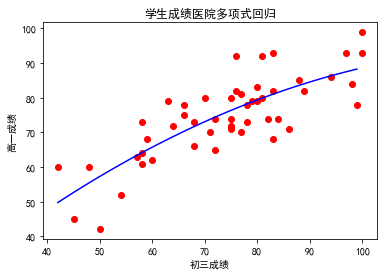

In [43]:
plt.scatter(x,y,color='red')

x_min=x.min()
x_max=x.max()
x_index=np.arange(x_min,x_max).reshape(-1,1)

plt.plot(x_index,linear.predict(poly_reg.fit_transform(x_index)),color='blue')
plt.xlabel("初三成绩")
plt.ylabel('高一成绩')
plt.title("学生成绩医院多项式回归")